       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

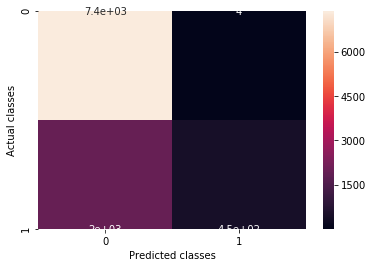

Max depth: 1, Accuracy: 0.76 (+/- 0.00)
Max depth: 2, Accuracy: 0.76 (+/- 0.01)
Max depth: 3, Accuracy: 0.76 (+/- 0.03)
Max depth: 4, Accuracy: 0.76 (+/- 0.00)
Max depth: 5, Accuracy: 0.77 (+/- 0.05)
Max depth: 6, Accuracy: 0.77 (+/- 0.03)
Max depth: 7, Accuracy: 0.77 (+/- 0.03)
Max depth: 8, Accuracy: 0.77 (+/- 0.03)
Max depth: 9, Accuracy: 0.77 (+/- 0.03)
Max depth: 10, Accuracy: 0.77 (+/- 0.03)
Max depth: 11, Accuracy: 0.77 (+/- 0.03)
Max depth: 12, Accuracy: 0.77 (+/- 0.03)
Max depth: 13, Accuracy: 0.77 (+/- 0.03)
Max depth: 14, Accuracy: 0.77 (+/- 0.04)
Max depth: 15, Accuracy: 0.76 (+/- 0.03)
Max depth: 16, Accuracy: 0.76 (+/- 0.04)
Max depth: 17, Accuracy: 0.76 (+/- 0.04)
Max depth: 18, Accuracy: 0.75 (+/- 0.04)
Max depth: 19, Accuracy: 0.75 (+/- 0.04)


In [2]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import  cross_val_score,train_test_split # Import train_test_split function
from sklearn.metrics import confusion_matrix,accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



# load dataset
data = pd.read_csv("C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/\HW2_Submission/adult_census_income.csv")
#print(data)


# Change Y values to 1's and 0's
data['income'] = np.where(data['income'] == '>50K', 1, 0)
data['income'] = data['income'].astype('int64')
print(data)

#split dataset in features and target variable
feature_cols =  ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
#X = data.select_dtypes(include=['int64']) # Features
X = data[feature_cols]
y = data.income # Target variable
print(X.columns)

print("feature columns:", feature_cols)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy" , max_depth=3) # , max_depth=5; criterion="entropy"/"gini"

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy,
print("Accuracy:",(accuracy_score(y_test, y_pred)* 100) ,"%")

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('adult_census_income.png')
Image(graph.create_png())

#confusion matrix
cfm = confusion_matrix( y_test, y_pred)
print("Confusion Matrix", cfm)
plt.show()
sns.heatmap(cfm, annot=True) #annot=True to annotate cells
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')
plt.show()

#in depth calculation
for max_depth in range(1, 20):
    t = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scoresVal = cross_val_score(t, X, y, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scoresVal.mean(), scoresVal.std()*2))